In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from astropy.time import Time, TimezoneInfo
from statsmodels.tsa.stattools import adfuller

from lsst.sitcom import vandv
from lsst.ts.idl.enums import MTM1M3

from lsst.summit.utils.tmaUtils import TMAEventMaker, TMAState
from lsst.summit.utils.efdUtils import getEfdData, makeEfdClient
from lsst_efd_client import EfdClient
from tqdm import tqdm

from glob import glob
import sys, time, os, asyncio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.time import Time, TimeDelta
from scipy.interpolate import UnivariateSpline

from lsst_efd_client import EfdClient, resample, merge_packed_time_series, rendezvous_dataframes
from lsst.ts.idl.enums import MTM1M3

from scipy.signal import find_peaks
from scipy.interpolate import interp1d
import astropy.units as u
import sys
module_path = os.path.abspath(os.path.join('../scripts'))
if module_path not in sys.path:
    sys.path.append(module_path)
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from lsst.summit.utils.tmaUtils import TMAEventMaker, TMAState
from lsst.summit.utils.efdUtils import getEfdData, makeEfdClient, calcNextDay

In [3]:
from tma_event_maker_identify_hp_oscillations import *

In [16]:
begin_day_obs = 20230622
end_day_obs = 20230628

id_oscillations=identify_oscillation_events()

current_day_obs=begin_day_obs

In [17]:
eventMaker = TMAEventMaker()
events = eventMaker.getEvents(int(current_day_obs))
slews = [e for e in events if e.type==TMAState.SLEWING]

In [18]:
slews[0].begin.utc.iso

'2023-06-22 17:09:57.687'

In [19]:
for slew in slews:
    if  (slew.begin > Time('2023-06-23 10:00:00')):
        print(slew.begin.utc.iso, slew.seqNum)

2023-06-23 10:06:35.601 158
2023-06-23 10:39:20.131 159
2023-06-23 10:53:46.919 160
2023-06-23 10:57:13.682 161
2023-06-23 11:04:00.452 162
2023-06-23 11:06:27.209 163
2023-06-23 11:17:33.961 164
2023-06-23 11:24:39.424 165


In [20]:
client = makeEfdClient()

In [21]:
await id_oscillations.get_data(slews[158], client)

In [10]:
id_oscillations.peak_height=40

In [22]:
pts=id_oscillations.identify(id_oscillations.query_dict)

2


In [23]:
pts["heights"]

0    129.375482
1    180.469894
Name: heights, dtype: float64

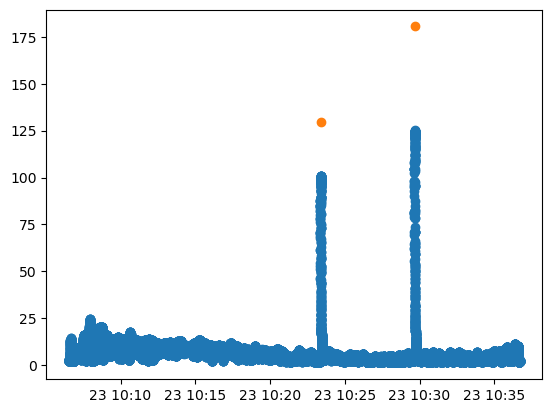

In [26]:
plt.scatter(id_oscillations.query_dict["hpmf"].index, 
            id_oscillations.query_dict["hpmf"]['measuredForce2'].rolling(100).std())
plt.scatter(Time(pts["times"], format="unix").datetime, pts["heights"])

In [41]:
id_oscillations.identify

<bound method identify_oscillation_events.identify of <tma_event_maker_identify_hp_oscillations.identify_oscillation_events object at 0x7ff6050f7a90>>

In [35]:

oscillation_events_frame = await id_oscillations.run(current_day_obs, client=client)

TypeError: identify_oscillation_events.run() got an unexpected keyword argument 'client'

In [21]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [7]:
events=pd.read_csv("../data/230628_combined_events.csv")

In [8]:
events=events.sort_values("times", ascending=False).reset_index(drop=True)

In [9]:
client = makeEfdClient()

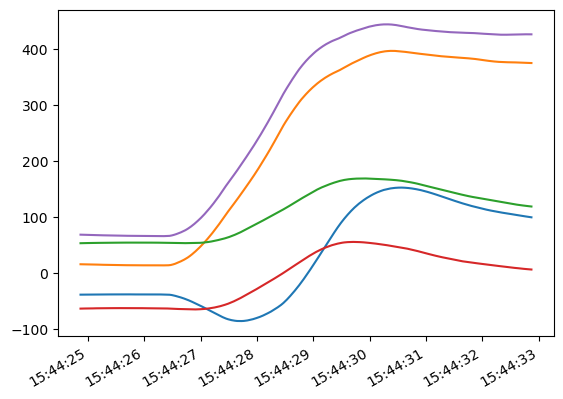

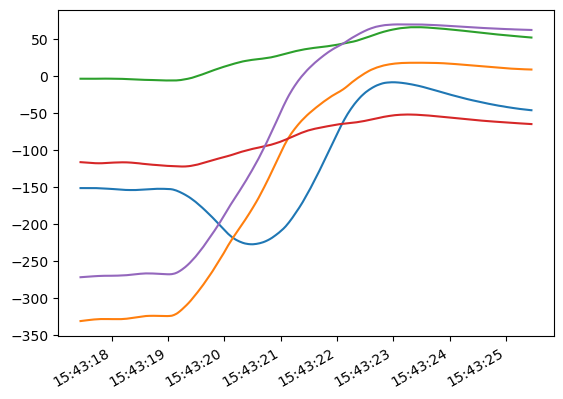

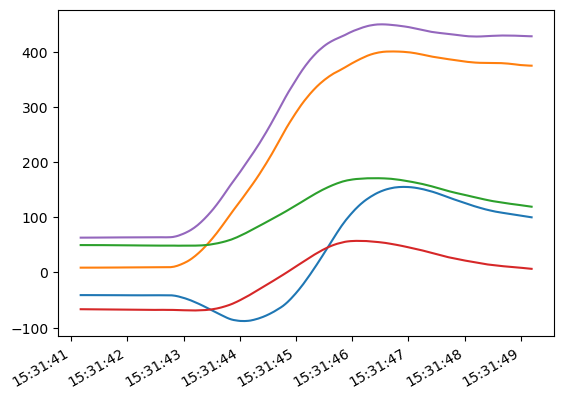

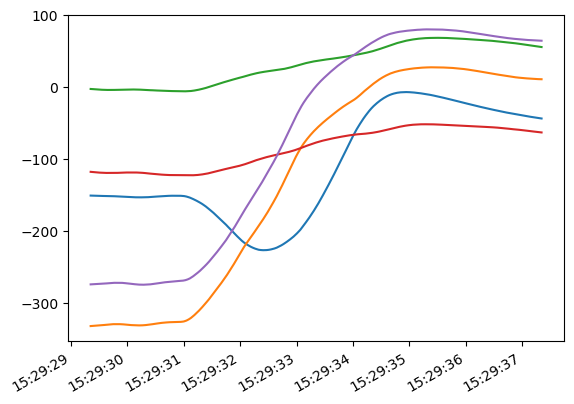

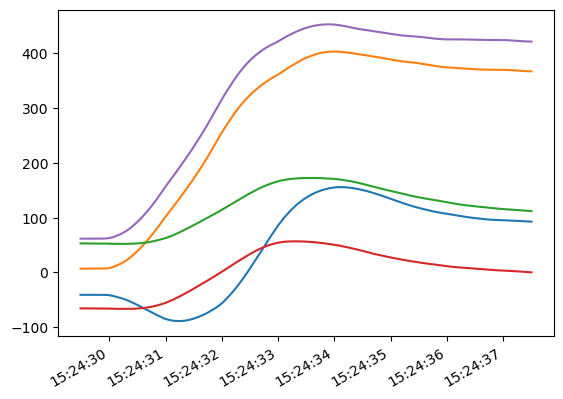

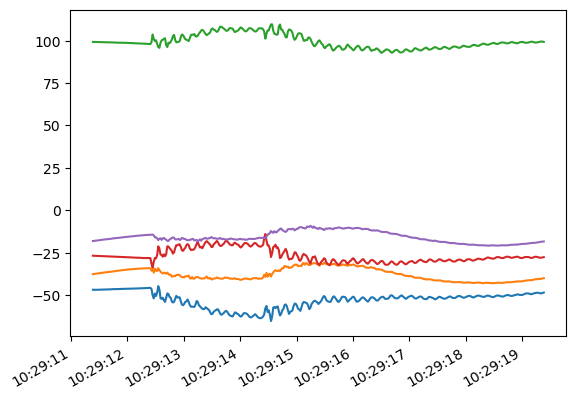

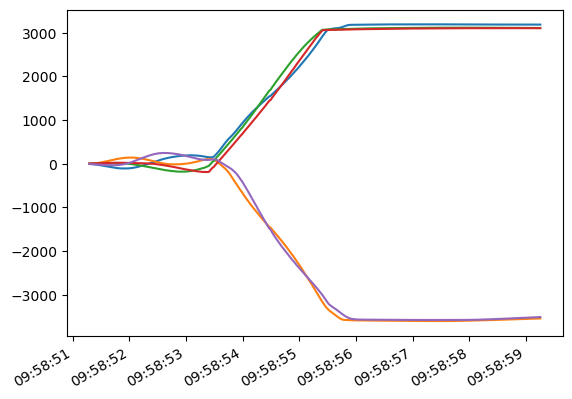

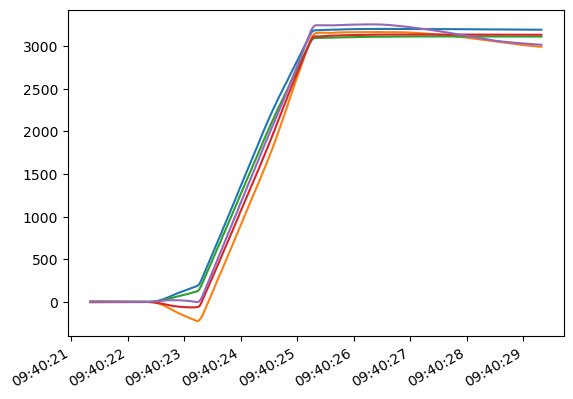

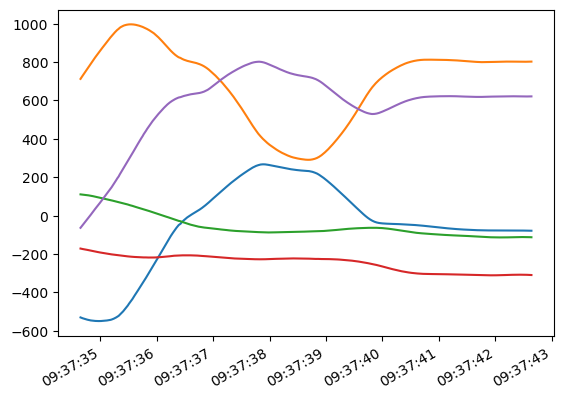

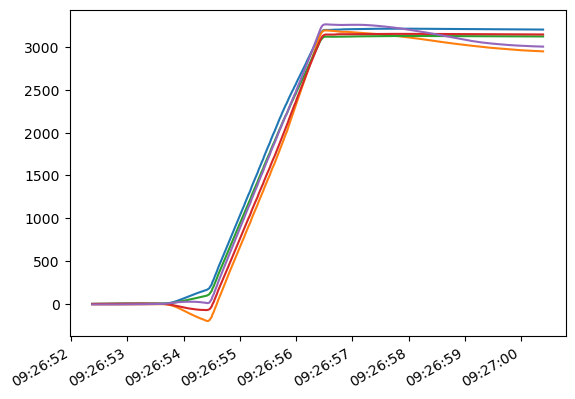

In [38]:
for i in np.arange(10)+10:
    data=getEfdData(client,"lsst.sal.MTM1M3.hardpointActuatorData" ,
               begin=Time(events["times"][i], format="unix"), 
               end=Time(events["times"][i], format="unix"), 
               prePadding=5,
               postPadding=5)
    fig=plt.figure()
    for j in np.arange(5):
        plt.plot(data.index, data[f"measuredForce{j}"].rolling(100).mean())
        fig.autofmt_xdate()

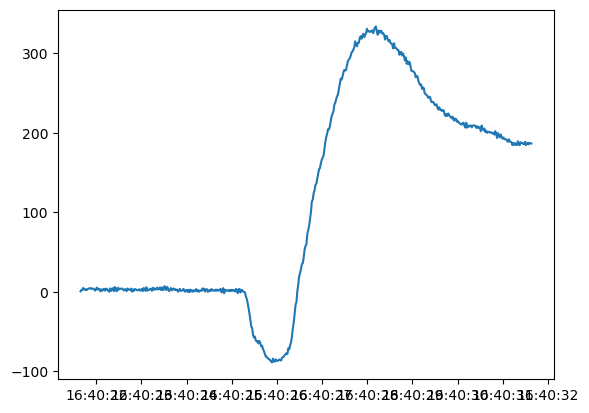